In [1]:
%load_ext autoreload
import datetime
# import ete3
import json
import matplotlib.pyplot as plt
# import networkx as nx
import numpy as np
import pandas as pd
# import re
import xml.etree.ElementTree as ET
# import xml.dom.minidom
# import xmlschema

In [2]:
%autoreload
from maxes.xes_loader2 import XesLoader, XesLog
# from maxes.xes_file import XesFile
from maxes.analyze_xes import AnalyzeXes
# import maxes.analyze_sequence
# import maxes.serialization.serialize
# import maxes.graphs
import maxes.utils

In [3]:
maxes.utils.setup_notebook_logging() # RUN ONLY ONCE

In [ ]:
xes_analysis_file_path = "/vt/md/maxes/maxes/output/xes_analysis.json"
with open(xes_analysis_file_path) as file:
    xes_analysis = json.load(file)
xes_analysis

In [ ]:
[entry["File"]["Path"] for entry in xes_analysis]

In [ ]:
interesting_files = [
    "/vt/md/maxes/maxes/data/Conformance Checking Challenge 2019 (CCC19)_1_all/data/CCC19 - Log XES.xes",
    "/vt/md/maxes/maxes/data/JUnit 4.12 Software Event Log_1_all/JUnit 4.12 Software Event Log.xes/JUnit 4.12 Software Event Log.xes",
    "/vt/md/maxes/maxes/data/NASA Crew Exploration Vehicle (CEV) Software Event Log_1_all/data/nasa-cev-complete-splitted.xes/nasa-cev-complete-splitted.xes",
    "/vt/md/maxes/maxes/data/Real-life event logs - Hospital log_1_all/Hospital_log.xes/Hospital_log.xes",
    "/vt/md/maxes/maxes/data/Road Traffic Fine Management Process_1_all/Road_Traffic_Fine_Management_Process.xes/Road_Traffic_Fine_Management_Process.xes",
    "/vt/md/maxes/maxes/data/Statechart Workbench and Alignments Software Event Log_1_all/data/Statechart Workbench and Alignments Software Event Log.xes/Statechart Workbench and Alignments Software Event Log.xes",
    "/vt/md/maxes/maxes/data/Activities of daily living of several individuals_1_all/data/activitylog_uci_detailed_labour.xes/activitylog_uci_detailed_labour.xes",
    "/vt/md/maxes/maxes/data/Apache Commons Crypto 1.0.0 - Stream CbcNopad Unit Test Software Event Log_1_all/data/ApacheCommons-Crypto-1.0.0-StreamCbcNopad-splitted.xes/ApacheCommons-Crypto-1.0.0-StreamCbcNopad-splitted.xes",
    "/vt/md/maxes/maxes/data/BPI Challenge 2012_1_all/BPI_Challenge_2012.xes/BPI_Challenge_2012.xes",
    "/vt/md/maxes/maxes/data/BPI Challenge 2013, closed problems_1_all/BPI_Challenge_2013_closed_problems.xes/BPI_Challenge_2013_closed_problems.xes",
    "/vt/md/maxes/maxes/data/BPI Challenge 2013, incidents_1_all/BPI_Challenge_2013_incidents.xes/BPI_Challenge_2013_incidents.xes",
    "/vt/md/maxes/maxes/data/BPI Challenge 2013, open problems_1_all/BPI_Challenge_2013_open_problems.xes/BPI_Challenge_2013_open_problems.xes",
    "/vt/md/maxes/maxes/data/BPI Challenge 2015 Municipality 1_1_all/BPIC15_1.xes",
    "/vt/md/maxes/maxes/data/BPI Challenge 2015 Municipality 2_1_all/BPIC15_2.xes",
    "/vt/md/maxes/maxes/data/BPI Challenge 2015 Municipality 3_1_all/BPIC15_3.xes",
]

xes_analysis = [entry for entry in xes_analysis if entry["File"]["Path"] in interesting_files]
[entry["File"]["Path"] for entry in xes_analysis]

In [46]:
plt.style.use("seaborn-v0_8-pastel")

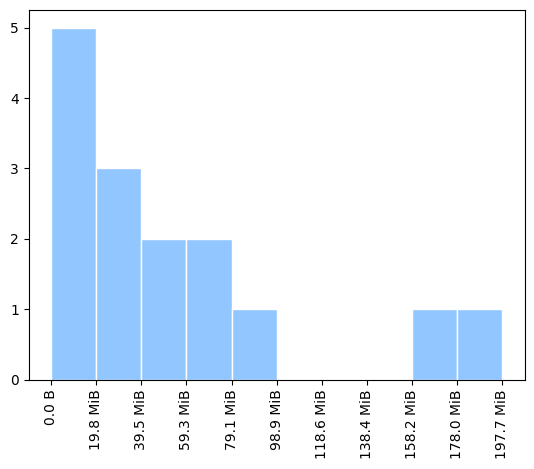

In [47]:
data = [entry["File"]["Size in bytes"] for entry in xes_analysis]

fig, ax = plt.subplots()
counts, bins, patches = ax.hist(
    data,
    range=[0, max(data)],
    edgecolor='white')

plt.xticks(
    bins,
    [maxes.utils.sizeof_fmt(bin) for bin in bins],
    rotation="vertical")

plt.show();

In [31]:
(min(data), max(data))

(339236, 207345060)

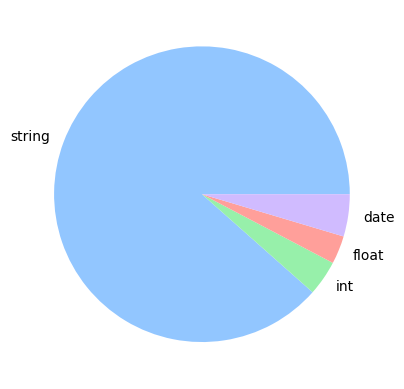

In [48]:
from collections import defaultdict

attribute_type_counts = defaultdict(lambda: 0)

for entry in xes_analysis:
    for attribute, attribute_info in entry["Events"]["Attributes"]["Each"].items():
        if attribute in ["time:timestamp", "concept:name", "concept:instance", "lifecycle:transition"]:
            continue

        xes_type = attribute_info["XES type"]
        attribute_type_counts[xes_type] += 1

plt.pie(attribute_type_counts.values(), labels=attribute_type_counts.keys());

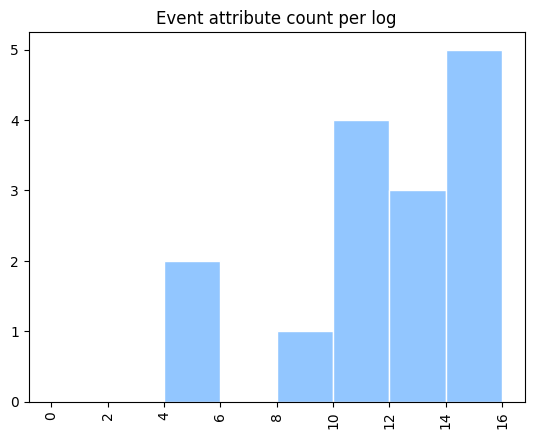

In [52]:
attributes_count = [entry["Events"]["Attributes"]["Unique count"] for entry in xes_analysis]

fig, ax = plt.subplots()
counts, bins, patches = ax.hist(
    attributes_count,
    bins=np.arange(0, 18, step=2),
    edgecolor='white')

plt.xticks(
    bins,
    rotation="vertical")
plt.title("Event attribute count per log")

plt.show();

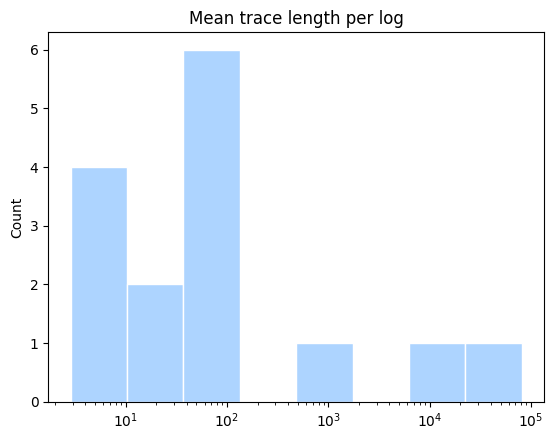

In [62]:
# Trace length per log
traces_lengths = [entry["Events"]["Count per trace"]["mean"] for entry in xes_analysis]

fig, ax = plt.subplots()
# counts, bins, patches = ax.hist(
#     traces_lengths,
#     # bins=np.arange(0, 18, step=2),
#     # range=[0, 90],
#     bins=8,
#     edgecolor='white')

# plt.xticks(
#     bins,
#     rotation="vertical")
# plt.title("Mean trace length per log")

# plt.show();

import seaborn as sns

plt.title("Mean trace length per log")
sns.histplot(traces_lengths, bins=8, log_scale=True, edgecolor='white');
